# Simple linear regression
## Imports 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import file|

In [ ]:
from google.colab import files
files.upload()

Saving student_scores.csv to student_scores.csv


{'student_scores.csv': b'Hours,Scores\r\n2.5,21\r\n5.1,47\r\n3.2,27\r\n8.5,75\r\n3.5,30\r\n1.5,20\r\n9.2,88\r\n5.5,60\r\n8.3,81\r\n2.7,25\r\n7.7,85\r\n5.9,62\r\n4.5,41\r\n3.3,42\r\n1.1,17\r\n8.9,95\r\n2.5,30\r\n1.9,24\r\n6.1,67\r\n7.4,69\r\n2.7,30\r\n4.8,54\r\n3.8,35\r\n6.9,76\r\n7.8,86\r\n'}

In [ ]:
dataset = pd.read_csv('student_scores.csv')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Explore our dataset 
dataset.shape

(25, 2)

In [ ]:
#Describe the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plot the Dataset using linear regression

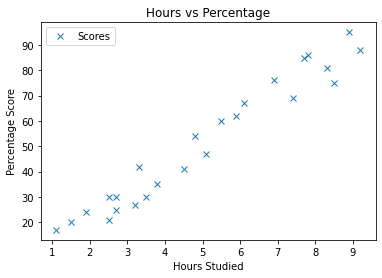

In [ ]:
dataset.plot(x='Hours', y='Scores', style='x')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Prepare Data

In [ ]:
X = dataset.iloc[:, :-1].values #- 1 means that do not take the last column of the table.
y = dataset.iloc[:, 1].values

Split data usning 20/80 rule

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train the algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Retrieve Intercept

In [ ]:
print(regressor.intercept_)

2.018160041434662


Retrieve Coefficient(Slope of X)

In [ ]:
print(regressor.coef_)

[9.91065648]


Make Predictions

In [ ]:
y_pred = regressor.predict(X_test)

y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

To compare the actual output values for X_test with the predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluate the Algorithm

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


Value of root mean squared error is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job